<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [3]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [4]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [5]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from collections import Counter

import spacy

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\gensim\corpora\dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\gensim\models\doc2vec.py:73: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import namedtuple, defaultdict, Iterable
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\thinc\neural\train.py:7: DeprecationWarning: Using

In [6]:
STOPWORDS = set(STOPWORDS).union(set([' ', '  ', '   ']))

def tokenize(doc):
    return [token for token in simple_preprocess(doc, deacc=True, min_len=4, max_len=20) if token not in STOPWORDS]

In [7]:
yelp['tokenized'] = yelp['text'].apply(tokenize)
yelp['tokenized'].head()

0    [beware, fake, fake, fake, small, business, al...
1    [came, lunch, togo, service, quick, staff, fri...
2    [vegas, dozens, times, stepped, foot, circus, ...
3    [went, night, closed, street, party, best, act...
4    [stars, price, lunch, seniors, eating, food, s...
Name: tokenized, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [8]:
import os
import re
import spacy
nlp = spacy.load('en_core_web_lg')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [9]:
vect = TfidfVectorizer(tokenizer=tokenize)

dtm = vect.fit_transform(yelp['text'])
dtm_df = pd.DataFrame(dtm.todense(),columns=vect.get_feature_names())
dtm_df.head()

,aaaahhhs,aaasssk,aabs,aamco,aand,aaron,aback,abandoned,abby,abdc,...,言えはレシートももらえるかもしれません,誓約書にサイン,誰も乗車しなくても,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語て指導かあります,食へ物はうまい,餐後點了甜點
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [11]:
bad_fake_review_text = ["When I walked into this place, my instincts were telling me to walk right out, but I decided to give the food a try. 15 minutes I walked out of the restaurant and decided to always trust my instincts."]
bad_text_transformed = vect.transform(bad_fake_review_text)
_, similar_review_indices = nn.kneighbors(bad_text_transformed.todense())

In [12]:
similar_reviews = [yelp.text[t] for t in similar_review_indices]

for review in similar_reviews:
    print(review)

9773    My bf and I walked in there at 2:21 am, as we ...
2710    I have only been to Panda Express once before ...
4237    Stopped in before dropping the parents off at ...
4899    I don't want to even rate this place to be hon...
1112    Walked in right before closing and they were a...
Name: text, dtype: object


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
vect = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier()
pipe = Pipeline([
                 #Vectorizer
                 ('vect', vect), 
                 # Classifier
                 ('clf', rfc)
                ])

In [15]:
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp.text, yelp.stars)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.75, 1.0), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (500, 1000), 'clf__n_estimators': (5, 10), 'clf__max_depth': (15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [16]:
grid_search.best_score_


0.5404

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [17]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [18]:
yelp['lemma'] = yelp.text.apply(tokenize)
id2word = Dictionary(yelp.lemma)

Create a bag of words representation of the entire corpus

In [19]:
corpus = [id2word.doc2bow(text) for text in yelp.lemma]

Your LDA model should be ready for estimation: 

In [20]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [21]:
print(lda.print_topics())
doc_lda = lda[corpus]

[(0, '0.013*"good" + 0.012*"place" + 0.011*"great" + 0.008*"like" + 0.008*"service" + 0.008*"food" + 0.007*"time" + 0.006*"love" + 0.005*"best" + 0.005*"staff"'), (1, '0.013*"food" + 0.010*"place" + 0.009*"great" + 0.008*"good" + 0.008*"time" + 0.007*"service" + 0.006*"like" + 0.005*"nice" + 0.004*"best" + 0.004*"amazing"'), (2, '0.013*"place" + 0.012*"good" + 0.010*"service" + 0.010*"food" + 0.009*"great" + 0.007*"time" + 0.007*"like" + 0.004*"best" + 0.004*"ordered" + 0.004*"chicken"'), (3, '0.011*"great" + 0.011*"place" + 0.010*"good" + 0.009*"like" + 0.007*"food" + 0.007*"service" + 0.006*"time" + 0.005*"nice" + 0.004*"went" + 0.004*"best"'), (4, '0.012*"place" + 0.010*"great" + 0.008*"food" + 0.008*"good" + 0.008*"service" + 0.007*"time" + 0.007*"like" + 0.004*"staff" + 0.004*"love" + 0.004*"order"'), (5, '0.014*"food" + 0.013*"good" + 0.012*"service" + 0.010*"like" + 0.010*"great" + 0.009*"time" + 0.008*"place" + 0.005*"people" + 0.005*"came" + 0.004*"best"'), (6, '0.010*"place" 

In [22]:
import pyLDAvis
import pyLDAvis.gensim


In [23]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.001659  0.003706       1        1  10.815254
0     -0.002099 -0.004490       2        1  10.753198
5     -0.006330  0.001444       3        1  10.448536
2     -0.001146 -0.001718       4        1  10.420198
8      0.000856  0.002746       5        1   9.865313
7      0.000729  0.002520       6        1   9.822634
4      0.002855 -0.001037       7        1   9.816890
3      0.001377 -0.003509       8        1   9.607894
9     -0.001040  0.001402       9        1   9.407384
6      0.003139 -0.001064      10        1   9.042706, topic_info=     Category         Freq        Term        Total  loglift  logprob
130   Default  4746.000000        food  4746.000000  30.0000  30.0000
16    Default  3323.000000        like  3323.000000  29.0000  29.0000
37    Default  4440.000000        good  4440.000000  28.0000  28.0000
83    Default  1685.000000        nice  1685.000000  27.0000  27.0000
42    Default  3497.000000     service  3497.000000  26.0000  26.0000
122   Default  4550.000000       place  4550.000000  25.0000  25.0000
355   Default  1446.000000       order  1446.000000  24.0000  24.0000
349   Default  1369.000000      little  1369.000000  23.0000  23.0000
191   Default  4121.000000       great  4121.000000  22.0000  22.0000
106   Default  1429.000000        went  1429.000000  21.0000  21.0000
386   Default   805.000000       asked   805.000000  20.0000  20.0000
667   Default  1586.000000        love  1586.000000  19.0000  19.0000
36    Default  1333.000000    friendly  1333.000000  18.0000  18.0000
120   Default  1380.000000      people  1380.000000  17.0000  17.0000
34    Default  1438.000000        came  1438.000000  16.0000  16.0000
27    Default  1158.000000        said  1158.000000  15.0000  15.0000
861   Default   695.000000       happy   695.000000  14.0000  14.0000
389   Default  1113.000000      better  1113.000000  13.0000  13.0000
43    Default  1504.000000       staff  1504.000000  12.0000  12.0000
1109  Default   612.000000      coffee   612.000000  11.0000  11.0000
176   Default  1310.000000     amazing  1310.000000  10.0000  10.0000
22    Default   877.000000     minutes   877.000000   9.0000   9.0000
101   Default   825.000000       times   825.000000   8.0000   8.0000
1304  Default   450.000000   breakfast   450.000000   7.0000   7.0000
320   Default  1398.000000        come  1398.000000   6.0000   6.0000
6     Default   612.000000      called   612.000000   5.0000   5.0000
489   Default   708.000000        meal   708.000000   4.0000   4.0000
434   Default  1172.000000        know  1172.000000   3.0000   3.0000
482   Default   905.000000        work   905.000000   2.0000   2.0000
31    Default  3296.000000        time  3296.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
326   Topic10   150.372330  definitely  1391.908447   0.1779  -5.5686
667   Topic10   166.888672        love  1586.011475   0.1516  -5.4644
122   Topic10   411.780640       place  4550.935059   0.0006  -4.5612
106   Topic10   149.121979        went  1429.868164   0.1426  -5.5769
625   Topic10    52.109680        town   418.937469   0.3188  -6.6283
1367  Topic10    34.789413        size   261.873047   0.3847  -7.0324
37    Topic10   376.269135        good  4440.373535  -0.0650  -4.6514
329   Topic10    75.546989      dinner   667.534180   0.2244  -6.2569
893   Topic10    57.779266        huge   485.875488   0.2739  -6.5251
130   Topic10   370.044556        food  4746.441895  -0.1483  -4.6681
16    Topic10   272.155853        like  3323.379639  -0.0992  -4.9753
168   Topic10   110.361610   recommend  1119.373169   0.0865  -5.8779
164   Topic10   115.117455        menu  1191.155762   0.0665  -5.8357
111   Topic10   154.697464        best  1747.326904  -0.0212  -5.5402
42    Topic10   260.789215     service  3497.739990  -0.1929  -5.0180
31    Topic10   246

In [28]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []

    tokens = yelp.lemma
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [29]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=20)

In [30]:
topic_coherence = pd.DataFrame.from_records(coherence_values)


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


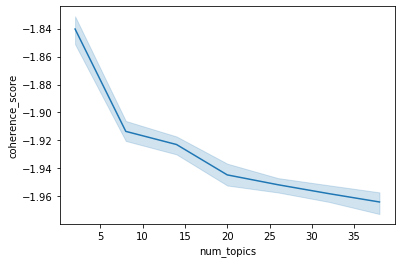

In [32]:
import seaborn as sns
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

Most of the yelp review are about food and most have a positive bent. This is initially surprising since I think those with a complaint are more likely to make an effort to leave a review. However, on reflection, the local nature of yelp may mean people are more likely to advocate for the good place where they live or visit. People may also be inclined to be positive about a place they've already given money to.

The coherence score graph shows very negative scores. Ever moreso than the one from lecture. Therefore I think it has limited use.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)